In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import decartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [3]:
path = "Rat_Sightings.csv"
df = pd.read_csv(path, low_memory=False)

df = df[["Created Date", "Closed Date", "Location Type", "Incident Zip", "Incident Address", "City", "Borough", "Latitude", "Longitude", "Location"]]
df.sort_values(by=['Created Date'], inplace=True)
display(df)

df['Location Type'].unique()

df['Borough'].unique()




Created Date             Closed Date  \
159386  01/01/2010 02:15:27 PM                     NaN   
158069  01/01/2010 03:05:37 PM                     NaN   
158077  01/01/2010 04:14:27 PM                     NaN   
159170  01/01/2010 08:29:58 AM                     NaN   
54396   01/01/2010 08:52:19 PM                     NaN   
...                        ...                     ...   
193038  12/31/2021 12:18:57 PM  01/03/2022 12:36:00 PM   
193022  12/31/2021 12:24:21 PM  12/31/2021 12:24:21 PM   
193020  12/31/2021 12:27:19 PM  12/31/2021 12:27:19 PM   
192984  12/31/2021 12:33:27 AM  12/31/2021 12:33:27 AM   
193015  12/31/2021 12:56:21 PM  12/31/2021 12:56:21 PM   

                  Location Type  Incident Zip                Incident Address  \
159386          Vacant Building       11218.0         900 CONEY ISLAND AVENUE   
158069  3+ Family Apt. Building       11377.0                 31-14 58 STREET   
158077  3+ Family Apt. Building       10467.0            2504 BRONX PARK EAST   
159170  3+ Family Apt. Building       11206.0              202 PULASKI STREET   
54396     Other (Explain Below)       11201.0                             NaN   
...                         ...           ...                             ...   
193038      Commercial Building       10471.0  4685 MANHATTAN COLLEGE PARKWAY   
193022    Other (Explain Below)       11230.0                  2367 24 AVENUE   
193020      1-2 Family Dwelling       11221.0              411 MADISON STREET   
192984      Commercial Building       10028.0           1617 EAST   85 STREET   
193015      1-2 Family Dwelling       10465.0          3140 COUNTRY CLUB ROAD   

             City    Borough   Latitude  Longitude  \
159386   BROOKLYN   BROOKLYN  40.635654 -73.967757   
158069   WOODSIDE     QUEENS  40.756987 -73.903618   
158077      BRONX      BRONX  40.863614 -73.870441   
159170   BROOKLYN   BROOKLYN  40.692989 -73.943771   
54396    BROOKLYN   BROOKLYN  40.688903 -73.980929   
...           ...        ...        ...        ...   
193038      BRONX      BRONX  40.890878 -73.898321   
193022   BROOKLYN   BROOKLYN  40.614030 -73.973995   
193020   BROOKLYN   BROOKLYN  40.685695 -73.942154   
192984  MANHATTAN  MANHATTAN  40.775548 -73.948319   
193015      BRONX      BRONX  40.842424 -73.824004   

                                        Location  
159386   (40.63565426900362, -73.96775698011807)  
158069  (40.756986581184535, -73.90361811283164)  
158077    (40.8636140600279, -73.87044117516707)  
159170   (40.69298896011082, -73.94377050323628)  
54396    (40.68890317557533, -73.98092864957985)  
...                                          ...  
193038   (40.89087758142548, -73.89832066775104)  
193022   (40.61402964427997, -73.97399495034388)  
193020   (40.68569530343264, -73.94215409798927)  
192984    (40.77554780362181, -73.9483186773805)  
193015  (40.842423809444824, -73.82400410672514)  

[207253 rows x 10 columns]

array(['BROOKLYN', 'QUEENS', 'BRONX', 'MANHATTAN', 'STATEN ISLAND',
       'Unspecified', nan], dtype=object)

Text(0.5, 1.0, 'NYC Rat Incident Heatmap')

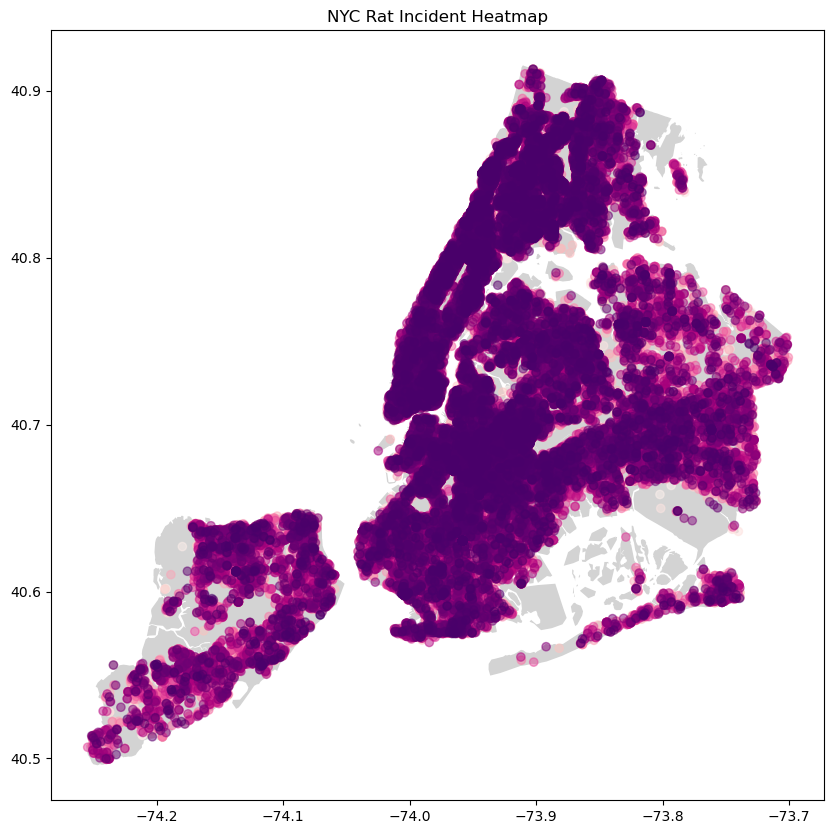

In [4]:
street_map = gpd.read_file("nyu_2451_34490")

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, 
                          crs = ('EPSG:4326'), 
                          geometry = geometry)

fig, ax = plt.subplots(figsize = (10,10))
street_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, cmap = 'RdPu', alpha = .5)

ax.set_title('NYC Rat Incident Heatmap')

Frequency:  10534
Frequency:  10454
Frequency:  10643
Frequency:  10739
Frequency:  12617
Frequency:  15286
Frequency:  17230
Frequency:  19152
Frequency:  17353
Frequency:  16808
Frequency:  16262
Frequency:  25012
Frequency:  25163


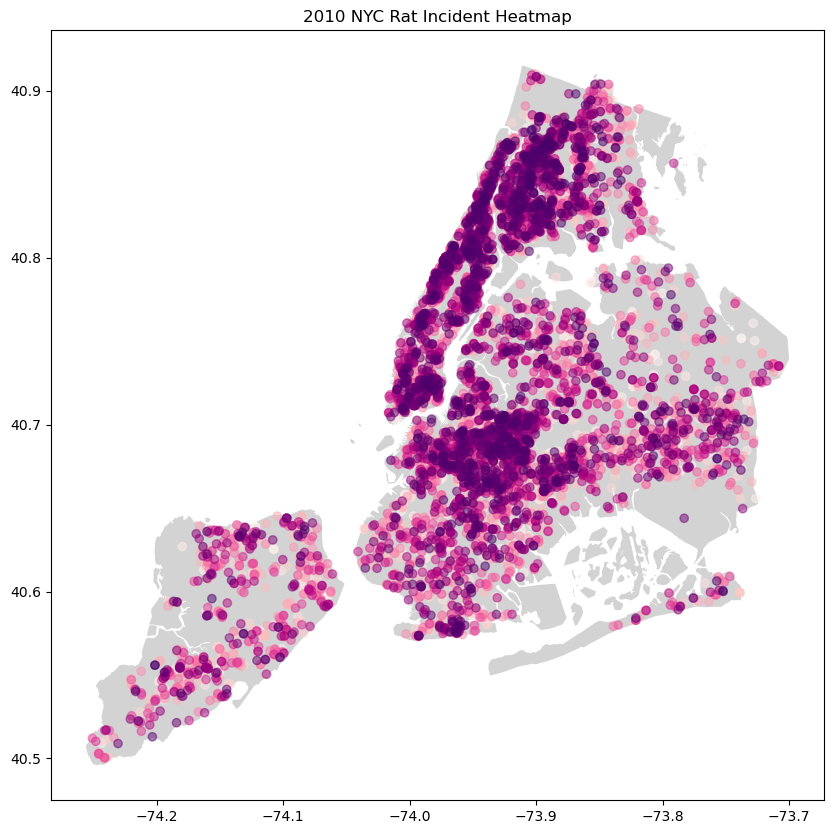

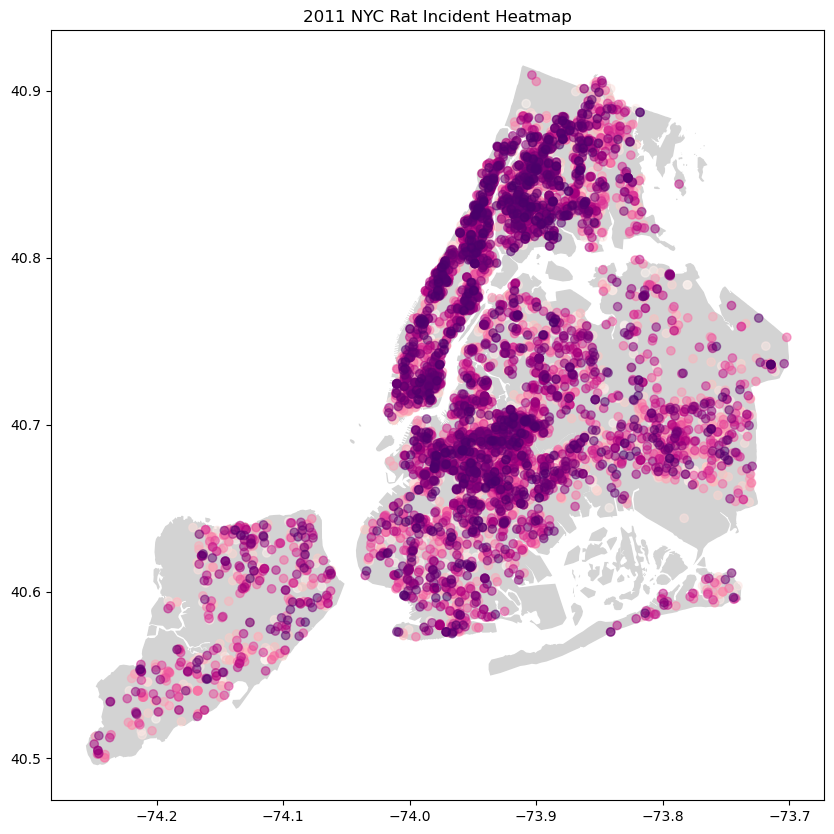

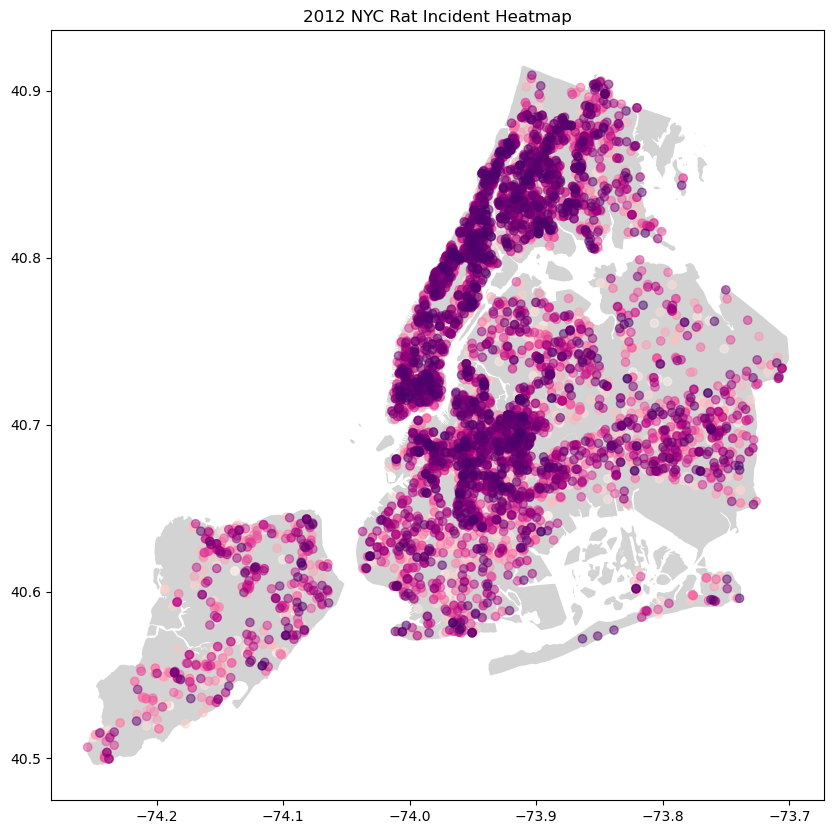

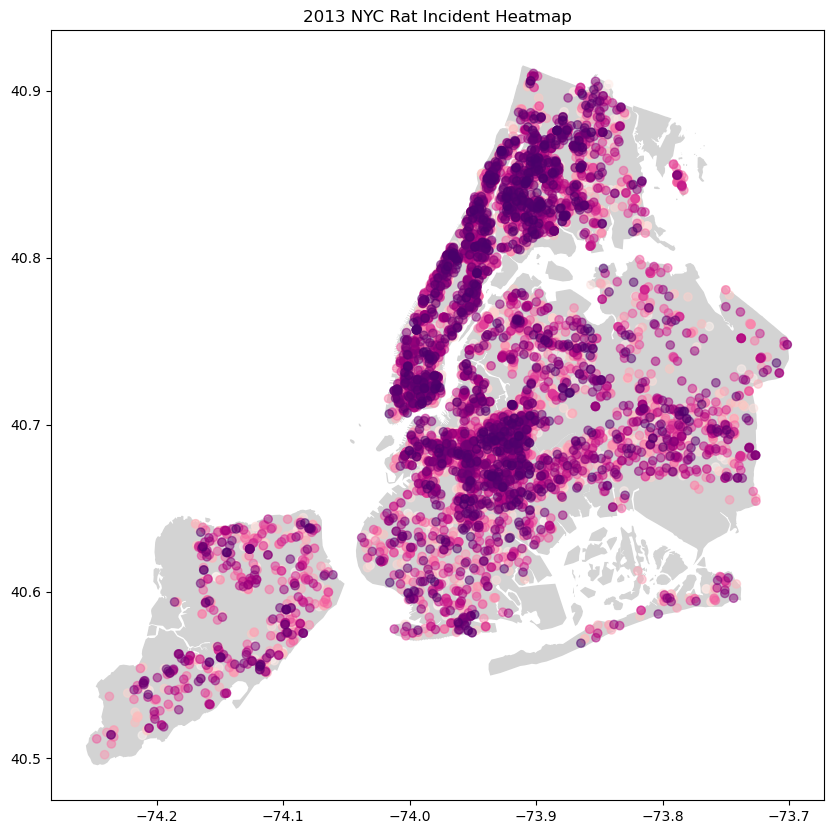

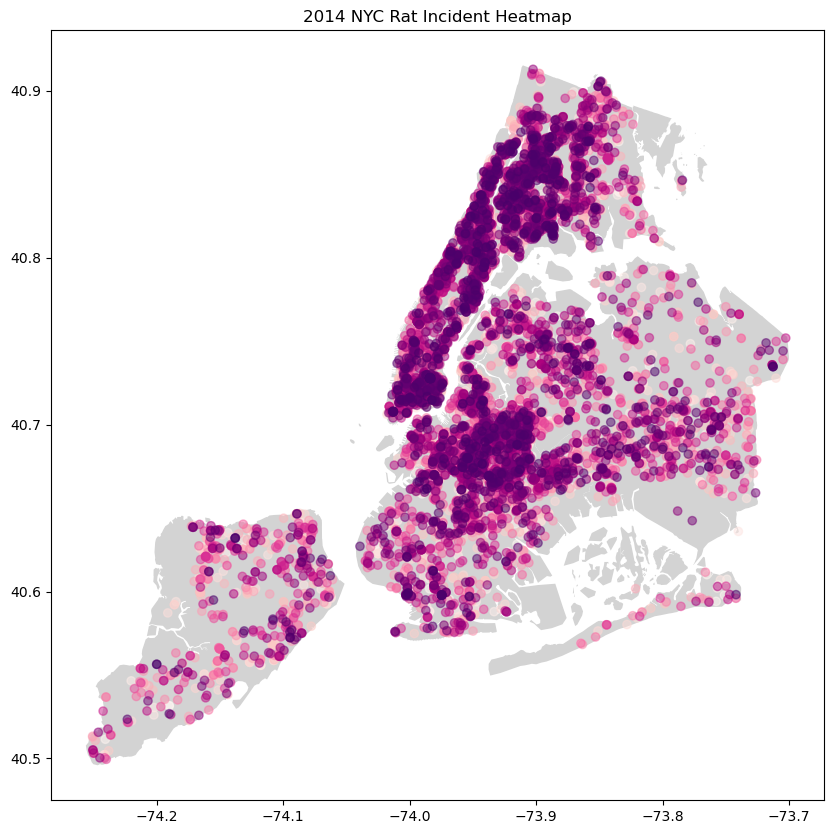

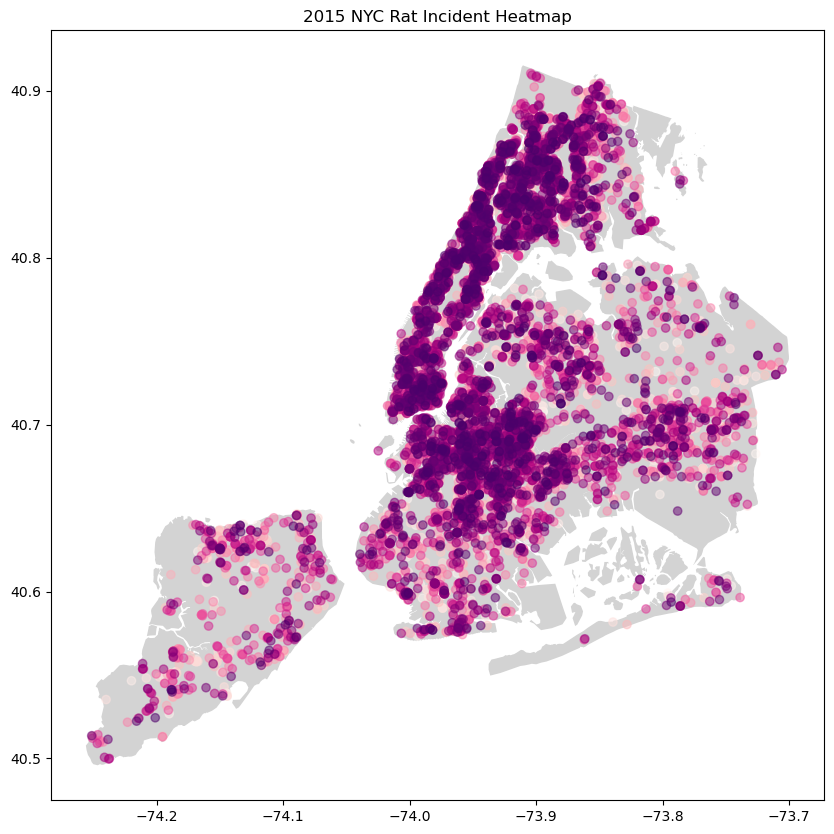

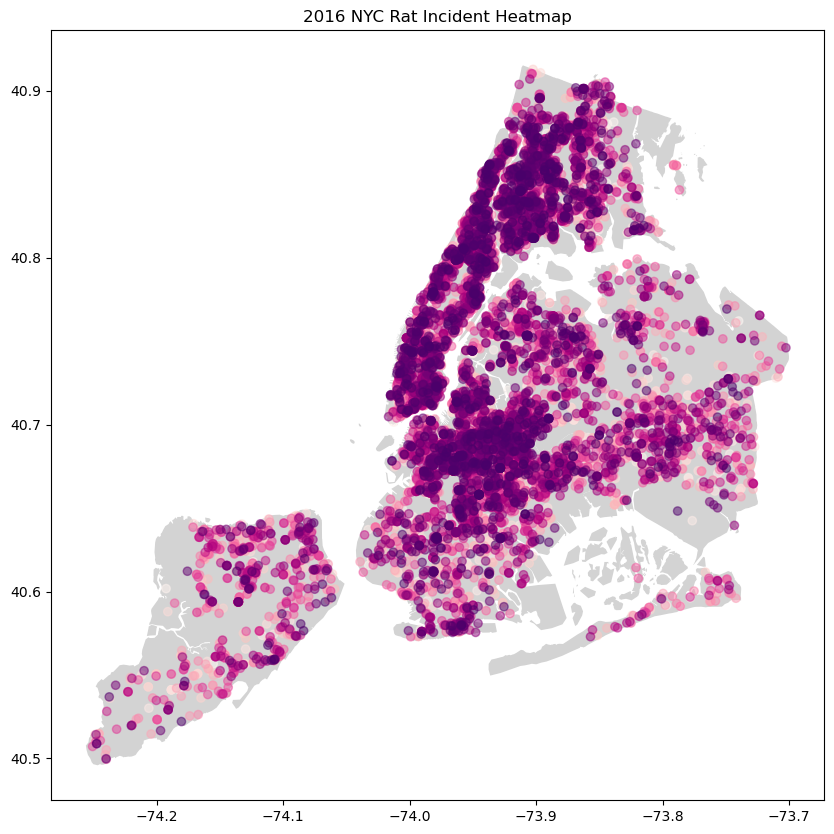

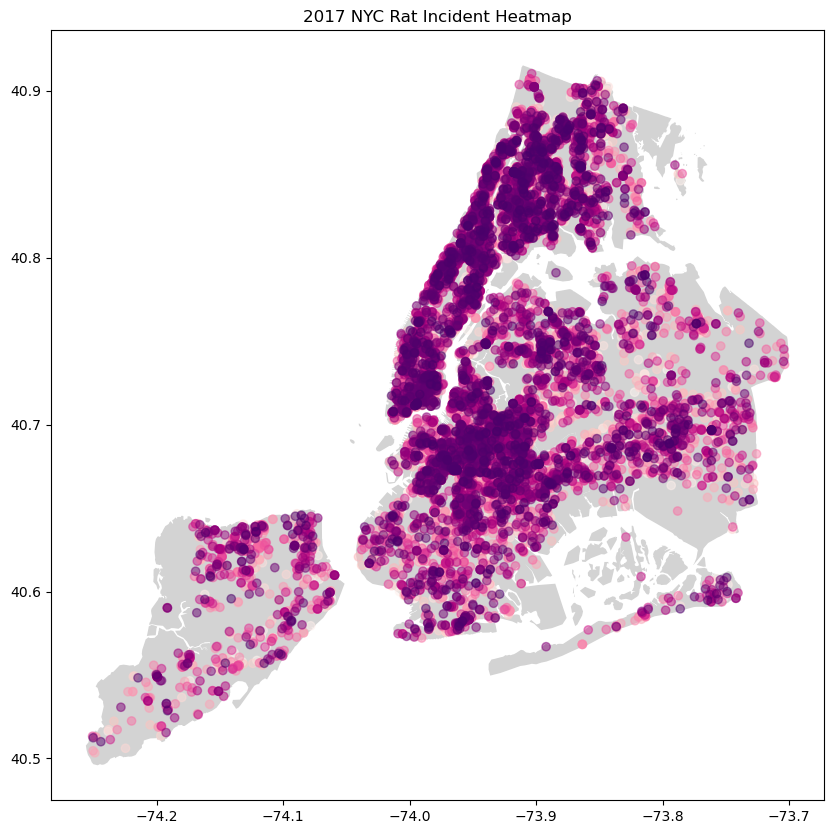

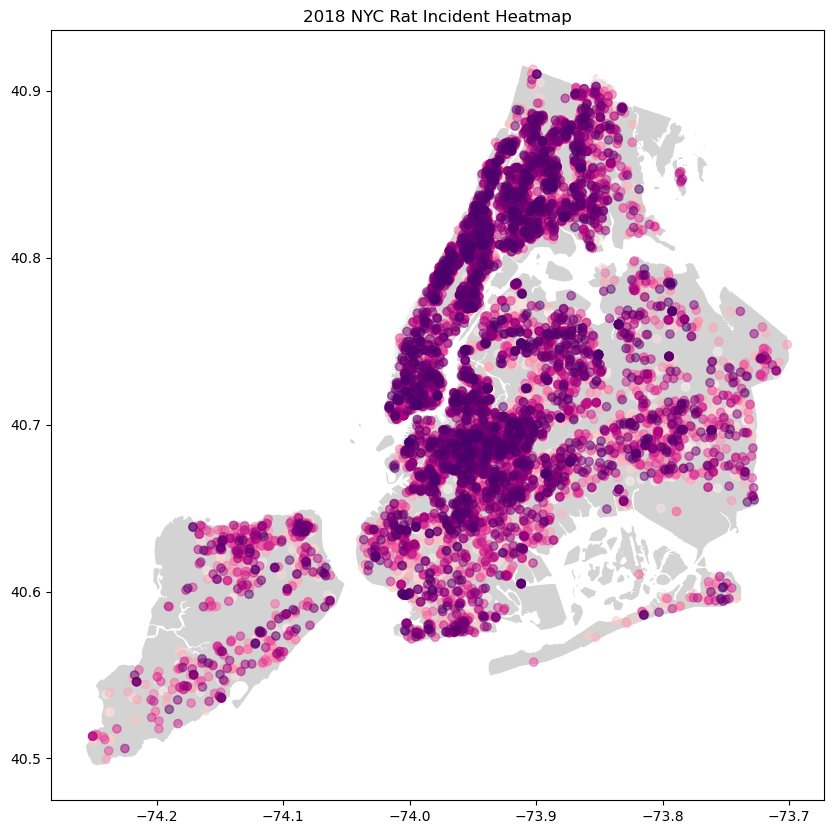

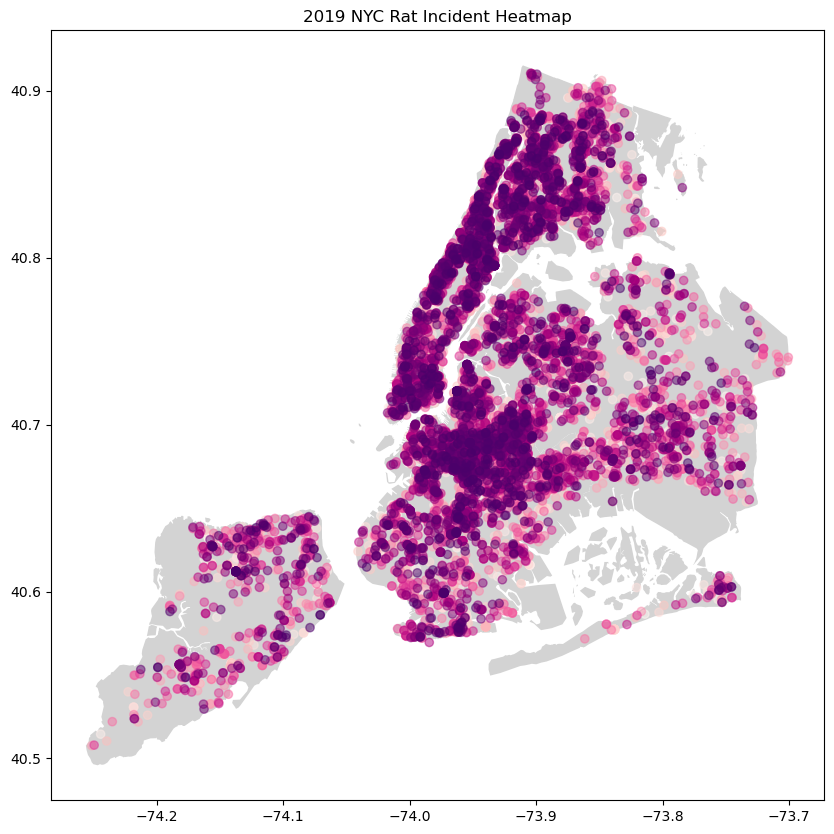

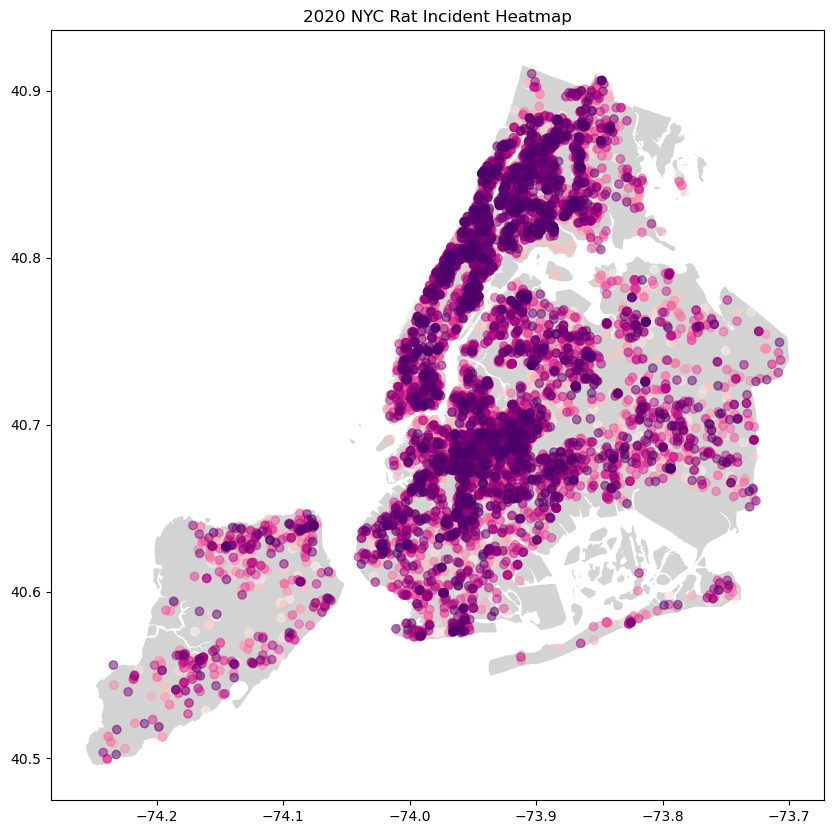

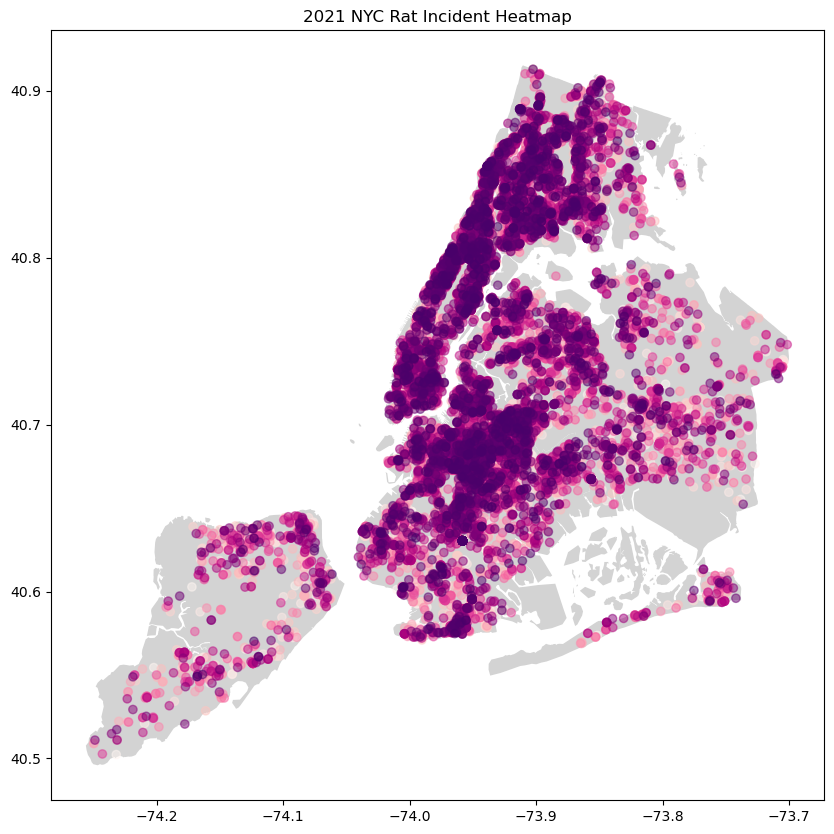

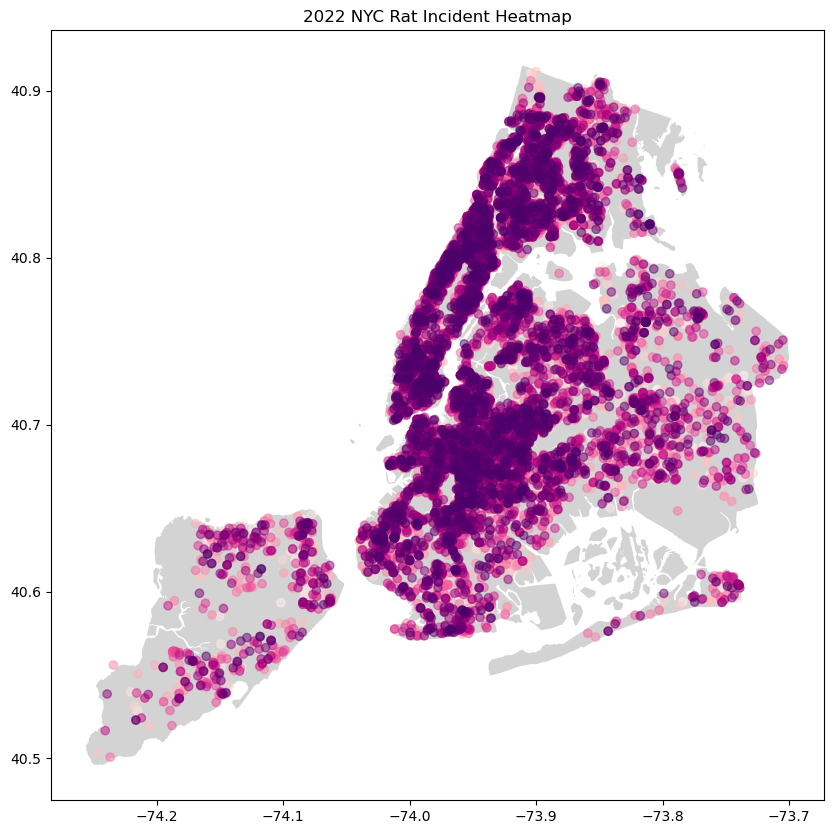

In [5]:
from datetime import datetime 

format = '%m/%d/%Y %H:%M:%S %p'

df['year'] = df['Created Date'].apply(lambda x: datetime.strptime(x, format).year)
df['month'] = df['Created Date'].apply(lambda x: datetime.strptime(x, format).month)

for year in df.groupby(['year']):
    df_year = df[df['year'] == year[0]]
    print('Frequency: ', str(len(year[1])))
    geometry = [Point(xy) for xy in zip(df_year['Longitude'], df_year['Latitude'])]
    geo_df = gpd.GeoDataFrame(df_year, 
                          crs = ('EPSG:4326'), 
                          geometry = geometry)

    fig, ax = plt.subplots(figsize = (10,10))
    street_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
    geo_df.plot(ax=ax, cmap = 'RdPu', alpha = .5)

    ax.set_title(str(year[0]) + ' NYC Rat Incident Heatmap')


By observing the graphs visually, it seems like rat sightings are happening at the same locations at roughly the same frequency every year. It is hard to detect any variantion from a heatmap. How can we get a clearer picture of the annual rat sighting frequencies?

In [6]:
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['3+ Family Apt. Building','3+ Family Apartment Building','Apartment','3+ Family Apt.', '3+Family Apt.', '3+ Family Apt'], 'Apartment Building'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['1-3 Family Mixed Use Building', '1-2 Family Mixed Use Building', '3+ Family Mixed Use Building'], 'Mixed Use Building'))

df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['1-2 FamilyDwelling', '1-3 Family Dwelling', '1-2 Family Dwelling'], 'Family Dwelling'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Restaurant/Bar/Deli/Bakery', 'Store', 'Commercial Building', 'Catering Service', 'Retail Store', 'Restaurant', 'Grocery Store'], 'Commercial Property'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Abandoned Building', 'Vacant Building', 'Vacant Lot'], 'Vacant Lot/Property'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Street Fair Vendor', 'Ground', 'Street Area'], 'Street'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Summer Camp', 'Cafeteria - Public School', 'School/Pre-School'], 'School'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Residential Property','Residence','Private House','Single Room Occupancy (SRO)','Mixed Use Building', 'Family Dwelling', 'Apartment Building'], 'Residential Building'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Other (Explain Below)'], 'Other'))
df['Location Type'].unique()

array(['Vacant Lot/Property', 'Residential Building', 'Other',
       'Commercial Property', 'Catch Basin/Sewer', 'Public Garden',
       'Parking Lot/Garage', 'Street', 'Construction Site',
       'Government Building', 'School', 'Building (Non-Residential)',
       'Public Stairs', 'Day Care/Nursery', 'Hospital', 'Office Building',
       nan, 'Beach'], dtype=object)

<AxesSubplot:>

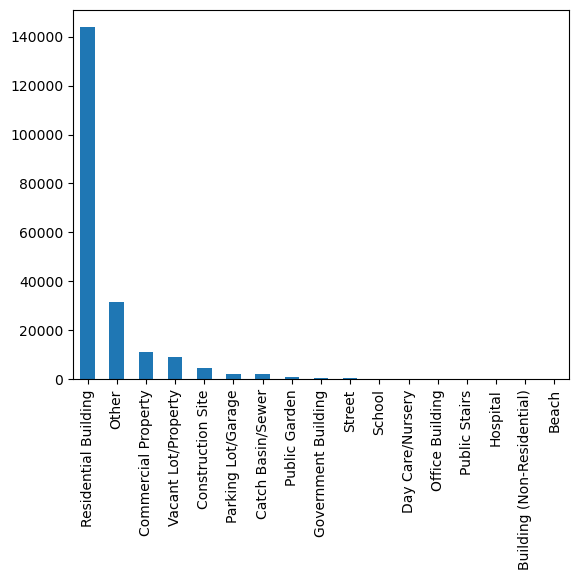

In [7]:
df['Location Type'].value_counts().plot(kind='bar')